In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [38]:
# Read csv data into data frame
original_dataframe = pd.read_csv("../Case_PRB.csv", low_memory=False)

# Sort the complete dataframe on the date column
original_dataframe.sort_values('date')

# Show the dataframe to illustrate the available data.
original_dataframe.head(500)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AFG,Asia,Afghanistan,2020-10-12,39799.0,96.0,65.429,1477.0,4.0,2.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
496,AGO,Africa,Angola,2020-03-22,2.0,2.0,NaN,0.0,0.0,NaN,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
497,AGO,Africa,Angola,2020-03-23,2.0,0.0,NaN,0.0,0.0,NaN,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
498,AGO,Africa,Angola,2020-03-24,2.0,0.0,NaN,0.0,0.0,NaN,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581


In [39]:
# All the columns that are accessible in the dataframe.
original_dataframe.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [40]:
# Set all the continuous values in one array.
original_dataframe_cont = original_dataframe[['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]

# Set all the string values in one array.
original_dataframe_cat = original_dataframe[['iso_code', 'continent', 'location']]

In [41]:
# Categorize the string values with one hot encoding.
categorized_dataframe = pd.get_dummies(original_dataframe, columns = original_dataframe_cat.columns)

# Show the result of one hot encoding. It spread the values from one column to multiple flag columns.
categorized_dataframe.filter(regex='^iso_code_',axis=1).head()
categorized_dataframe.filter(regex='^continent_',axis=1).head()
categorized_dataframe.filter(regex='^location_',axis=1).head()

,location_Afghanistan,location_Albania,location_Algeria,location_Andorra,location_Angola,location_Anguilla,location_Antigua and Barbuda,location_Argentina,location_Armenia,location_Aruba,...,location_Uruguay,location_Uzbekistan,location_Vatican,location_Venezuela,location_Vietnam,location_Western Sahara,location_World,location_Yemen,location_Zambia,location_Zimbabwe
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Remove the missing values before we train the model. Because we don't want them in our model.
categorized_dataframe.dropna(subset=['extreme_poverty', 'total_deaths'], inplace=True)

# Showing that all the missing values are removed.
categorized_dataframe[['diabetes_prevalence', 'total_deaths']].value_counts(dropna=False)

diabetes_prevalence  total_deaths
3.94                 0.0             252
9.75                 0.0             213
10.55                0.0             212
4.82                 0.0             211
6.00                 0.0             210
                                    ... 
6.41                 123.0             1
                     139.0             1
                     161.0             1
                     179.0             1
NaN                  635.0             1
Length: 12652, dtype: int64

C:\Users\desle\AppData\Local\Temp\ipykernel_34068\1079510161.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train, y_train)


InvalidIndexError: (slice(None, None, None), None)

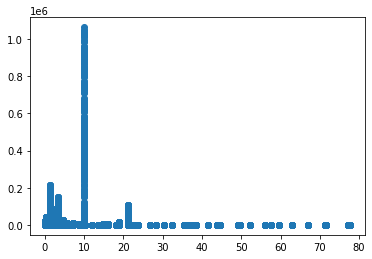

In [43]:
# Get the independent data to predict with.
X = categorized_dataframe[['extreme_poverty']]

# Get the dependent data to predict with.
Y = categorized_dataframe[['total_deaths']]

# Split the data into test and training data.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Set the forest regressor object.
reg = RandomForestRegressor(n_estimators=10, random_state=0)

# Build the tree from the training set.
reg.fit(x_train, y_train)

# Get the predictions based on the test data.
reg.predict(x_train)

# Fill the plot with data to show the diagram.
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))

plt.show()